# The Oscars

## Great stories and great visual effects

#### Author: Ruturaj Kiran Vaidya

#### Data Source:

I selected the soccer dataset used in previous projects, as it has a lot of features to work with and it will be great for visualizations.

<ul>
<li>Dataset: <a>https://github.com/fivethirtyeight/data/tree/master/soccer-spi</a></li>

<li>Specific Dataset Link: <a>https://projects.fivethirtyeight.com/soccer-api/club/spi_matches.csv</a></li>
</ul>

#### Idea: In addition to what has been instructed, I decided to use different plot libraries - to test their graphs, code in general. Also it's so much fun!

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
pd.plotting.register_matplotlib_converters()
import numpy as np

### Importing Dataset

In [2]:
matches = pd.read_csv("../data/external/spi_matches.csv")

In [3]:
print(matches.shape)
# Dropping NAs
matches.dropna(inplace = True)
matches.drop_duplicates(inplace=True)
# It's true that the dataset disfigures, but we need to do this anyways for end analysis
print(matches.shape)

(32286, 22)
(13164, 22)


In [4]:
matches.tail()

,date,league_id,league,team1,team2,spi1,spi2,prob1,prob2,probtie,...,importance1,importance2,score1,score2,xg1,xg2,nsxg1,nsxg2,adj_score1,adj_score2
27398,2019-11-24,2105,Brasileiro Série A,Ceará,São Paulo,50.83,58.03,0.4722,0.2304,0.2974,...,58.6,0.0,1.0,1.0,1.45,1.10,2.18,1.25,1.05,1.05
27399,2019-11-24,5641,Argentina Primera Division,Banfield,Velez Sarsfield,45.18,49.89,0.3604,0.3395,0.3001,...,0.1,24.1,1.0,0.0,1.18,0.68,1.22,0.94,1.05,0.00
27400,2019-11-24,5641,Argentina Primera Division,Gimnasia La Plata,Arsenal Sarandi,39.86,41.82,0.4214,0.3207,0.2579,...,0.0,2.5,0.0,1.0,0.42,1.03,0.94,0.95,0.00,1.05
27401,2019-11-24,5641,Argentina Primera Division,Talleres de Córdoba,Racing Club,41.86,52.61,0.2983,0.4110,0.2908,...,2.3,36.1,3.0,3.0,3.46,1.50,1.17,0.93,3.15,3.15
27402,2019-11-24,1952,Mexican Primera Division Torneo Apertura,FC Juárez,Tigres UANL,33.13,56.53,0.1562,0.5786,0.2652,...,0.0,88.5,1.0,2.0,1.12,0.72,0.71,0.76,1.05,2.10


In [5]:
matches.keys()

Index(['date', 'league_id', 'league', 'team1', 'team2', 'spi1', 'spi2',
       'prob1', 'prob2', 'probtie', 'proj_score1', 'proj_score2',
       'importance1', 'importance2', 'score1', 'score2', 'xg1', 'xg2', 'nsxg1',
       'nsxg2', 'adj_score1', 'adj_score2'],
      dtype='object')

### The art of storytelling!

There are a lot of leagues all over the world. It is interesing to see how many leagues are there and how many teams are played in the major league. It is to be noted that teams relegate and promote from the leagues (national leagues). Also, there's a qualification process for champians and Europa leagues. Hence, below diagram shows total number of teams participated.

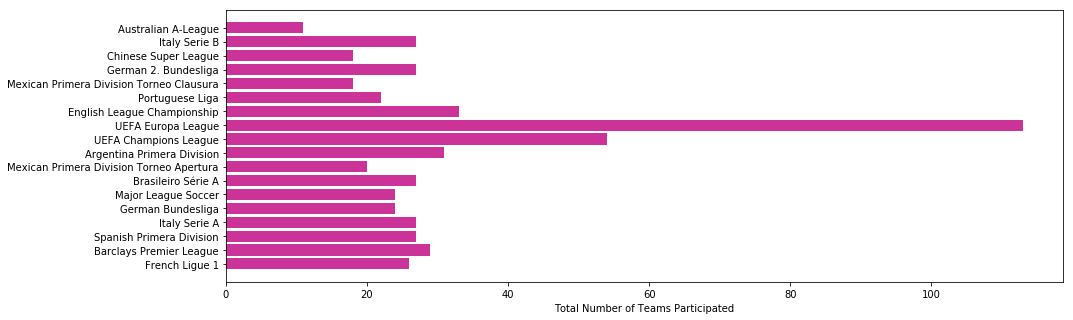

In [6]:
dic = {k:[] for k in matches.league.unique()}
[dic[i[0]].extend([i[1], i[2]]) for i in zip(matches.league, matches.team1, matches.team2)]
dic = {k:len(set(v)) for k,v in dic.items()}

plt.figure(figsize=(15, 5))
y_pos = np.arange(len(dic.keys()))
plt.barh(y_pos, list(dic.values()), color = "#cc3399")
plt.yticks(y_pos, list(dic.keys()))
plt.xlabel("Total Number of Teams Participated")
plt.show()

It is also interesting to see how many matches are played per league.

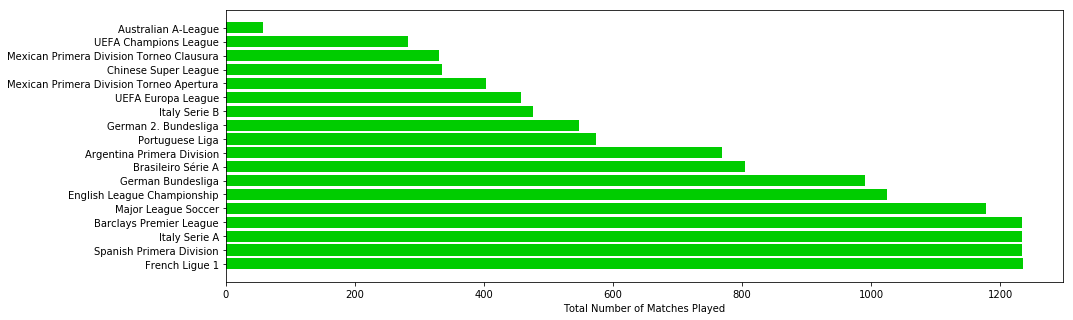

In [29]:
dic = matches.league.value_counts().to_dict()

plt.figure(figsize=(15, 5))
y_pos = np.arange(len(dic.keys()))
plt.barh(y_pos, list(dic.values()), color = "#00cc00")
plt.yticks(y_pos, list(dic.keys()))
plt.xlabel("Total Number of Matches Played")
plt.show()